In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




PATH = "./abalone.data.csv"

###################################################################################################################################################
class data_loader():

    def __init__(self,path) -> None:
        self.path = path

    def call(self):

        return pd.read_csv(self.path)

###################################################################################################################################################
class predict():
    
    def __init__(self,w,b) -> None:
        self.w = w
        self.b = b
    
    def pred(self,x):
        return (self.w * x) + self.b

###################################################################################################################################################
class MSE():
    
    def __init__(self,pred_y,true_y) -> None:
        self.pred_y = np.array(pred_y)
        self.true_y = np.array(true_y)
    
    def loss(self):
        return np.sum((self.true_y - self.pred_y)) / len(self.pred_y)

###################################################################################################################################################
class gd():
    
    def __init__(self,w,b,x,pred_y,true_y) -> None:
        self.w = w
        self.b = b
        self.x = x
        self.pred_y = np.array(pred_y)
        self.true_y = np.array(true_y)
    
    def gradient_b(self):
        
        return (np.sum((self.pred_y - self.true_y)) * 2) / len(self.pred_y)
    
    def gradient_w(self):
        
        return (np.sum((self.pred_y - self.true_y) * self.x) * 2) / len(self.pred_y)

###################################################################################################################################################

df = data_loader(PATH).call()
# Lets take only one col for best fit line with random W, B

W = 1
B = 0
lr = 0.001


pred_y = []

for _ in range(10):
    pred_inst = predict(W,B)

    for x in df['Height']:
        pred_y.append(pred_inst.pred(x))

    loss_call = MSE(pred_y,df['Age'])
    
    loss = loss_call.loss()
    
    print(f"{loss}\n")
    
    gd_class = gd(W,B,df['Height'].tolist(),pred_y,df['Age'])
    
    W -= W - (lr * gd_class.gradient_w())
    
    B -= B - (lr * gd_class.gradient_b())

9.794168063203255



ValueError: operands could not be broadcast together with shapes (4177,) (8354,) 

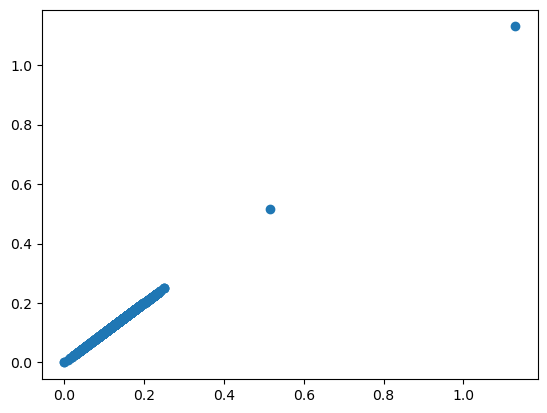

9.794168063203255

In [27]:
plt.scatter(df['Height'],pred_y)
plt.show()
loss